In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/bos_cleaned_allcolumns.csv')
#df.set_index('id', inplace=True)

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
pd.options.display.max_colwidth = 200

<font size=5, color=blue><b>Check dataset basics after loading the data</b></font>

In [3]:
df.head()

,name,host_is_superhost,host_identity_verified,nb,property,room,accommodates,bedrooms,beds,amenities,price,dataset,availability_30,availability_60,availability_90,availability_365,superhost,id_verified,nb_Back Bay,nb_Bay Village,nb_Beacon Hill,nb_Brighton,nb_Charlestown,nb_Chinatown,nb_Dorchester,nb_Downtown,nb_East Boston,nb_Fenway,nb_Hyde Park,nb_Jamaica Plain,nb_Leather District,nb_Longwood Medical Area,nb_Mattapan,nb_Mission Hill,nb_North End,nb_Roslindale,nb_Roxbury,nb_South Boston,nb_South Boston Waterfront,nb_South End,nb_West End,nb_West Roxbury,room_Hotel room,room_Private room,room_Shared room,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
0,HARBORSIDE-Walk to subway,t,f,East Boston,Apartment,Entire home/apt,2,1.0,0.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 1, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",125.0,pre-covid,11,20,20,97,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,**$49 Special ** Private! Minutes to center!,t,t,Roxbury,Guest suite,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 0, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",145.0,pre-covid,1,14,44,307,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,$99 Special!! Home Away! Condo,t,t,Roxbury,Condominium,Entire home/apt,4,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 1, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",169.0,pre-covid,1,4,19,266,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Curved Glass Studio/1bd facing Park,t,f,Downtown,Apartment,Entire home/apt,2,1.0,1.0,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air conditioning': 1, 'Kitchen': 1, 'Free parking on premises': 0, 'Free street parking': 0, 'Heating': 1, 'Washer': 1, 'Dryer': 1, 'Smoke detector': 1, 'Carbo...",99.0,pre-covid,17,42,42,290,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bright 1bed facing Golden Dome,t,f

In [4]:
df.shape

(6650, 99)

In [5]:
df.isnull().sum()

name                                          0
host_is_superhost                             0
host_identity_verified                        0
nb                                            0
property                                      0
room                                          0
accommodates                                  0
bedrooms                                      0
beds                                          0
amenities                                     0
price                                         0
dataset                                       0
availability_30                               0
availability_60                               0
availability_90                               0
availability_365                              0
superhost                                     0
id_verified                                   0
nb_Back Bay                                   0
nb_Bay Village                                0
nb_Beacon Hill                          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 99 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   name                                        6650 non-null   object 
 1   host_is_superhost                           6650 non-null   object 
 2   host_identity_verified                      6650 non-null   object 
 3   nb                                          6650 non-null   object 
 4   property                                    6650 non-null   object 
 5   room                                        6650 non-null   object 
 6   accommodates                                6650 non-null   int64  
 7   bedrooms                                    6650 non-null   float64
 8   beds                                        6650 non-null   float64
 9   amenities                                   6650 non-null   object 
 10  price       

In [7]:
df.columns

Index(['name', 'host_is_superhost', 'host_identity_verified', 'nb', 'property',
       'room', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'dataset', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'superhost', 'id_verified', 'nb_Back Bay',
       'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton', 'nb_Charlestown',
       'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown', 'nb_East Boston',
       'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain', 'nb_Leather District',
       'nb_Longwood Medical Area', 'nb_Mattapan', 'nb_Mission Hill',
       'nb_North End', 'nb_Roslindale', 'nb_Roxbury', 'nb_South Boston',
       'nb_South Boston Waterfront', 'nb_South End', 'nb_West End',
       'nb_West Roxbury', 'room_Hotel room', 'room_Private room',
       'room_Shared room', 'property_Apartment', 'property_Barn',
       'property_Bed and breakfast', 'property_Boat',
       'property_Boutique hotel', 'property_Bungalow', 'property_Castle',
    

<font size=6, color= 'teal'><b>Before started:</b></font>
- Usecase:
    - Provide rent reference to airbnb hosts so that new hosts can get idea how much rent to charge and the current hosts can check the site to understand whether the rent they are charging now is too high or too low compare to other properties on airbnb
---
- Problem statement:
 - How much money should an airbnb host charge their guest?
---
- Data: I am getting my data from two places:
    - Kaggle: airbnb hosts and property data from before April 2020
    - http://insideairbnb.com/get-the-data.html, data up to October 24, 202
        - The second data set has 600 less entry compare to the first one, and my assumption is that hosts dropped out of airbnb because of covid19.
---
- Model: It will be regression models
    - Regression on pre covid vs. post covid
    - I am going to run multiple regression models and pick the best one
---
- Output:
    - I am going to do my best to see if I can configure a private site using flask for the potential users to put in input to see the going rate reference based on the condition of the user's property

<font size=5, color=blue><b>Reorgznize columns by type</b></font>

In [8]:
nb_cols = [col for col in df.columns if col.startswith('nb_')]
nb = df[nb_cols]

In [9]:
room_cols = [col for col in df.columns if col.startswith('room_')]
room = df[room_cols]

In [10]:
property_cols = [col for col in df.columns if col.startswith('property_')]
property = df[property_cols]

In [11]:
property.head(2)

,property_Apartment,property_Barn,property_Bed and breakfast,property_Boat,property_Boutique hotel,property_Bungalow,property_Castle,property_Condominium,property_Cottage,property_Entire apartment,property_Entire bed and breakfast,property_Entire condominium,property_Entire cottage,property_Entire guest suite,property_Entire guesthouse,property_Entire home/apt,property_Entire house,property_Entire loft,property_Entire place,property_Entire serviced apartment,property_Entire townhouse,property_Guest suite,property_Guesthouse,property_Hostel,property_Hotel,property_House,property_Houseboat,property_Loft,property_Other,property_Private room in apartment,property_Private room in bed and breakfast,property_Private room in bungalow,property_Private room in castle,property_Private room in condominium,property_Private room in guest suite,property_Private room in guesthouse,property_Private room in house,property_Private room in loft,property_Private room in townhouse,property_Private room in villa,property_Room in aparthotel,property_Room in bed and breakfast,property_Room in boutique hotel,property_Room in hostel,property_Room in hotel,property_Serviced apartment,property_Shared room in apartment,property_Shared room in bed and breakfast,property_Shared room in boutique hotel,property_Shared room in condominium,property_Shared room in house,property_Shared room in townhouse,property_Townhouse,property_Villa
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
cols = ['price', 'dataset', 'room', 'nb', 'accommodates', 'bedrooms', 'beds', 'superhost', 'id_verified']

In [13]:
availibility_col = [col for col in df.columns if col.startswith('availability_')]

In [14]:
num_cols = ['room', 'accommodates', 'bedrooms', 'beds', 'price']

In [15]:
num = df[num_cols]

<font size=5, color=blue><b>Bos dataset overview</b></font>

In [16]:
bos = df[cols]

In [17]:
bos.head(2)

,price,dataset,room,nb,accommodates,bedrooms,beds,superhost,id_verified
0,125.0,pre-covid,Entire home/apt,East Boston,2,1.0,0.0,1,0
1,145.0,pre-covid,Entire home/apt,Roxbury,2,1.0,1.0,1,1


In [18]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         6650 non-null   float64
 1   dataset       6650 non-null   object 
 2   room          6650 non-null   object 
 3   nb            6650 non-null   object 
 4   accommodates  6650 non-null   int64  
 5   bedrooms      6650 non-null   float64
 6   beds          6650 non-null   float64
 7   superhost     6650 non-null   int64  
 8   id_verified   6650 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 467.7+ KB


In [19]:
bos.sort_index()

,price,dataset,room,nb,accommodates,bedrooms,beds,superhost,id_verified
0,125.0,pre-covid,Entire home/apt,East Boston,2,1.0,0.0,1,0
1,145.0,pre-covid,Entire home/apt,Roxbury,2,1.0,1.0,1,1
2,169.0,pre-covid,Entire home/apt,Roxbury,4,1.0,1.0,1,1
3,99.0,pre-covid,Entire home/apt,Downtown,2,1.0,1.0,1,0
4,150.0,pre-covid,Entire home/apt,Downtown,2,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
6645,319.0,post-covid,Entire home/apt,Downtown,6,2.0,2.0,0,1
6646,239.0,post-covid,Entire home/apt,Beacon Hill,4,1.0,1.0,0,1
6647,47.0,post-covid,Entire home/apt,Roxbury,4,1.0,1.0,0,1
6648,44.0,post-covid,Private room,Allston,1,1.0,1.0,0,1


In [20]:
bos['dataset'].value_counts()

pre-covid     3820
post-covid    2830
Name: dataset, dtype: int64

Text(0, 0.5, 'Listing Count')

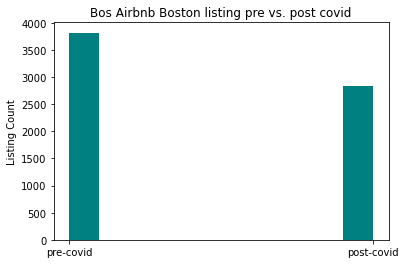

In [21]:
plt.hist(bos['dataset'], color='teal');
plt.title('Bos Airbnb Boston listing pre vs. post covid')
plt.ylabel('Listing Count')

In [22]:
bos.groupby('dataset')['price'].mean()

dataset
post-covid    167.137809
pre-covid     183.046335
Name: price, dtype: float64

<font size=5, color=blue><b>Define pre and post covid dataset</b></font>

In [39]:
post = bos[bos['dataset'] == 'post-covid']
post.head()

,price,dataset,room,nb,accommodates,bedrooms,beds,superhost,id_verified
3820,150.0,post-covid,Entire home/apt,East Boston,2,1.0,0.0,0,0
3821,145.0,post-covid,Entire home/apt,Roxbury,2,1.0,1.0,1,1
3822,169.0,post-covid,Entire home/apt,Roxbury,4,1.0,1.0,1,1
3823,81.0,post-covid,Entire home/apt,Downtown,2,1.0,1.0,1,1
3824,50.0,post-covid,Private room,Beacon Hill,1,1.0,0.0,0,1


In [40]:
post.count()

price           2830
dataset         2830
room            2830
nb              2830
accommodates    2830
bedrooms        2830
beds            2830
superhost       2830
id_verified     2830
dtype: int64

In [36]:
pre = bos[bos['dataset'] == 'pre-covid']
pre.head()

,price,dataset,room,nb,accommodates,bedrooms,beds,superhost,id_verified
0,125.0,pre-covid,Entire home/apt,East Boston,2,1.0,0.0,1,0
1,145.0,pre-covid,Entire home/apt,Roxbury,2,1.0,1.0,1,1
2,169.0,pre-covid,Entire home/apt,Roxbury,4,1.0,1.0,1,1
3,99.0,pre-covid,Entire home/apt,Downtown,2,1.0,1.0,1,0
4,150.0,pre-covid,Entire home/apt,Downtown,2,1.0,1.0,1,0


In [37]:
pre.count()

price           3820
dataset         3820
room            3820
nb              3820
accommodates    3820
bedrooms        3820
beds            3820
superhost       3820
id_verified     3820
dtype: int64

In [38]:
pre19_cases = pre.index.values.tolist()

<font size=5, color=teal><b>Summary of pre vs. post COVID:</b></font>

item|pre-covid (by Apr 2020)|post-covid (by Oct 2020)
---:|--------:|---------:
**before clean-up**
case count| 3845|3254
average price|182.451|161.303
**after clean-up**
dropped case count| 25|424
case count|3820|2830
average price|183.046|167.137
**Changes**
left||1633
stayed||2187
new||643


<font size=5, color=blue><b>Explore price</b></font>

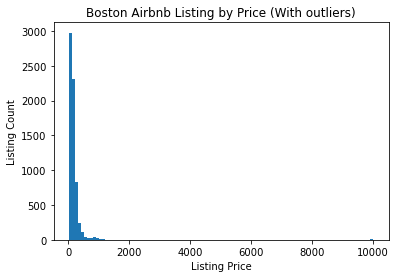

In [41]:
plt.hist(bos['price'], bins=100);
plt.title('Boston Airbnb Listing by Price (With outliers)')
plt.xlabel('Listing Price')
plt.ylabel('Listing Count');

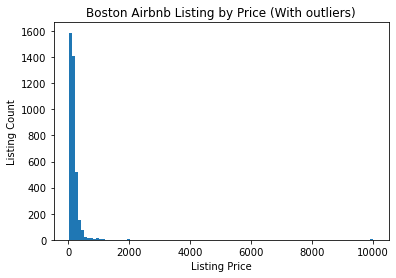

In [42]:
plt.hist(pre['price'], bins=100);
plt.title('Boston Airbnb Listing by Price (With outliers)')
plt.xlabel('Listing Price')
plt.ylabel('Listing Count');

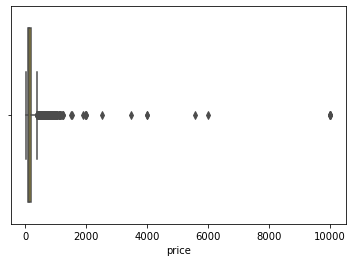

In [44]:
sns.boxplot(num.price, color = 'gold');

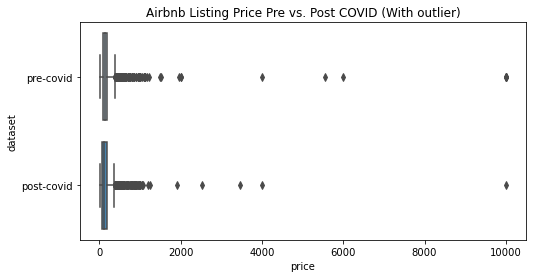

In [45]:
# Make a list of neighborhood sorted by mean 
ds_list = list(bos.groupby('dataset').price.mean().sort_values(ascending=False).index)

# Make a boxplot for sale price by neighborhood
plt.figure(figsize = (8, 4))
sns.boxplot(y = 'dataset', x = 'price', 
            data=bos, palette='Blues', 
            order = ds_list).set_title("Airbnb Listing Price Pre vs. Post COVID (With outlier)");
#plt.savefig("../figs/boxplot_neighborhoods.png")

In [46]:
pre[pre['price'] > 2000]['price'].count()

8

In [47]:
post[post['price'] > 2000]['price'].count()

4

<font size=3, color=blue><b>Handling Outliers:</b></font>

- Modeling with outliers
- Modeling with outliers dropped
- Modeling with price logged 

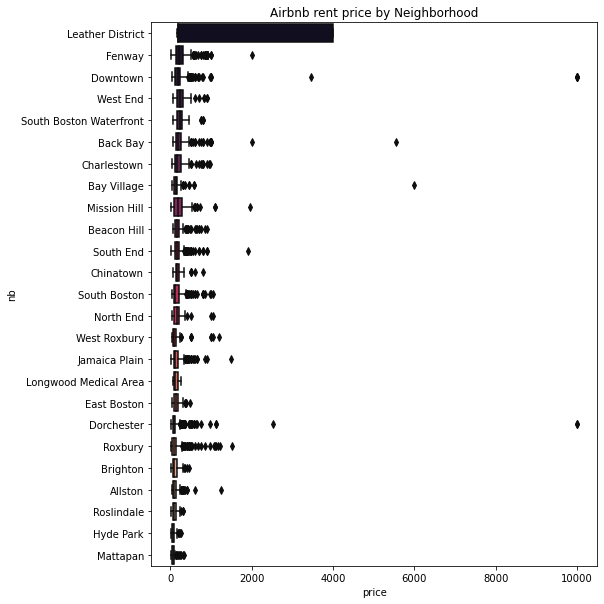

In [54]:
# Make a list of neighborhood sorted by mean 
nb_list = list(bos.groupby('nb').price.mean().sort_values(ascending=False).index)

# Make a boxplot for sale price by neighborhood
plt.figure(figsize = (8, 10))
sns.boxplot(y = 'nb', x = 'price', data=bos, palette='rocket', order = nb_list).set_title("Airbnb rent price by Neighborhood");
#plt.savefig("../figs/boxplot_neighborhoods.png")

Text(0, 0.5, 'Price')

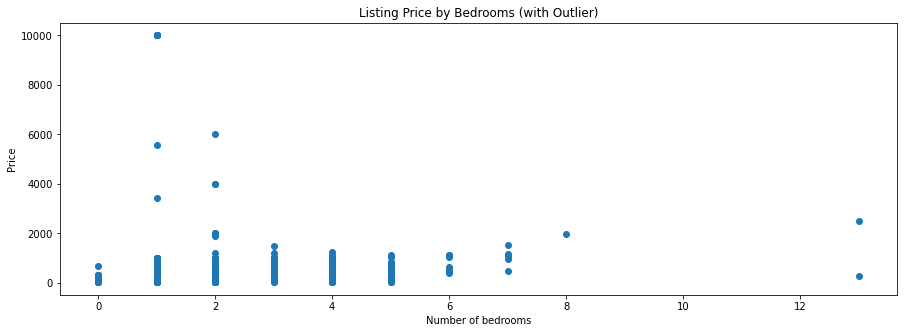

In [55]:
plt.figure(figsize = (15, 5))
plt.scatter(bos['bedrooms'], bos['price']);
plt.title('Listing Price by Bedrooms (with Outlier)')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

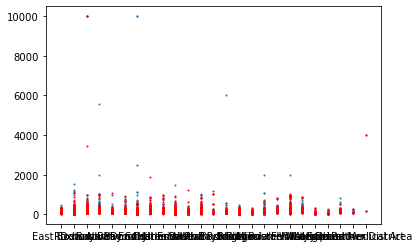

In [56]:
## How to make x.label readable?

plt.scatter(pre["nb"], pre["price"], s=1, )
plt.scatter(post["nb"], post["price"], s=1, color='red')

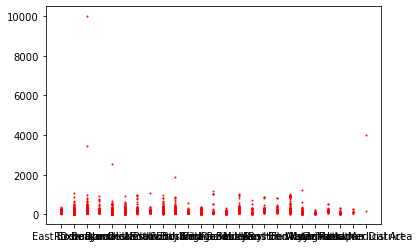

In [57]:
## How to make x.label readable?

plt.scatter(post["nb"], post["price"], s=1, color='red')

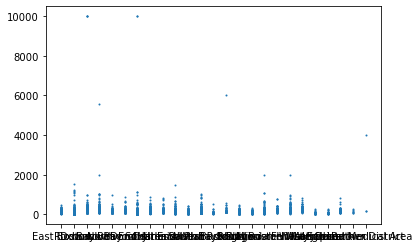

In [58]:
## How to make x.label readable?

plt.scatter(pre["nb"], pre["price"], s=1, )

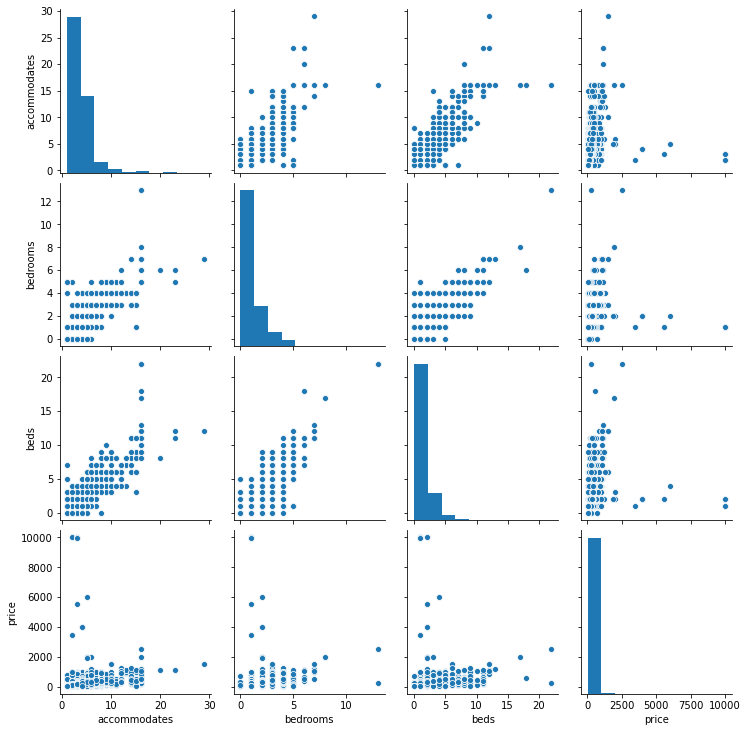

In [59]:
sns.pairplot(num)

## Check correlations: whole dataset

In [60]:
num.columns

Index(['room', 'accommodates', 'bedrooms', 'beds', 'price'], dtype='object')

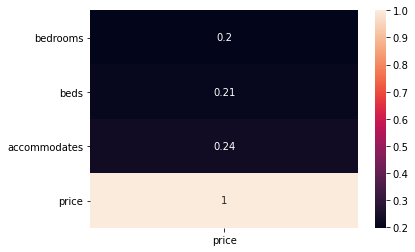

In [61]:
sns.heatmap(num.corr()[['price']].sort_values('price'), annot = True)

In [62]:
nb.columns

Index(['nb_Back Bay', 'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton',
       'nb_Charlestown', 'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown',
       'nb_East Boston', 'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain',
       'nb_Leather District', 'nb_Longwood Medical Area', 'nb_Mattapan',
       'nb_Mission Hill', 'nb_North End', 'nb_Roslindale', 'nb_Roxbury',
       'nb_South Boston', 'nb_South Boston Waterfront', 'nb_South End',
       'nb_West End', 'nb_West Roxbury'],
      dtype='object')

In [63]:
nb_corr = df[['nb_Back Bay', 'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton',
       'nb_Charlestown', 'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown',
       'nb_East Boston', 'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain',
       'nb_Leather District', 'nb_Longwood Medical Area', 'nb_Mattapan',
       'nb_Mission Hill', 'nb_North End', 'nb_Roslindale', 'nb_Roxbury',
       'nb_South Boston', 'nb_South Boston Waterfront', 'nb_South End',
       'nb_West End', 'nb_West Roxbury', 'price']]

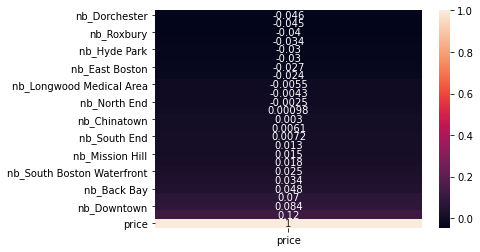

In [64]:
sns.heatmap(nb_corr.corr()[['price']].sort_values('price'), annot = True)

In [65]:
room.columns

Index(['room_Hotel room', 'room_Private room', 'room_Shared room'], dtype='object')

In [66]:
room_df = df[['room_Hotel room', 'room_Private room', 'room_Shared room', 'price']]

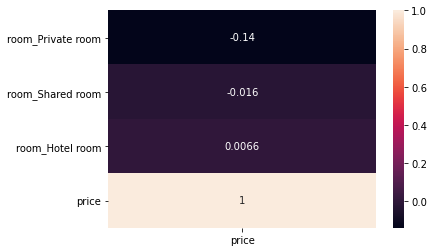

In [67]:
sns.heatmap(room_df.corr()[['price']].sort_values('price'), annot = True)

In [68]:
df.columns

Index(['name', 'host_is_superhost', 'host_identity_verified', 'nb', 'property',
       'room', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'dataset', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'superhost', 'id_verified', 'nb_Back Bay',
       'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton', 'nb_Charlestown',
       'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown', 'nb_East Boston',
       'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain', 'nb_Leather District',
       'nb_Longwood Medical Area', 'nb_Mattapan', 'nb_Mission Hill',
       'nb_North End', 'nb_Roslindale', 'nb_Roxbury', 'nb_South Boston',
       'nb_South Boston Waterfront', 'nb_South End', 'nb_West End',
       'nb_West Roxbury', 'room_Hotel room', 'room_Private room',
       'room_Shared room', 'property_Apartment', 'property_Barn',
       'property_Bed and breakfast', 'property_Boat',
       'property_Boutique hotel', 'property_Bungalow', 'property_Castle',
    

In [69]:
availability = df[['availability_30', 'availability_60', 'availability_90',
       'availability_365', 'price']]

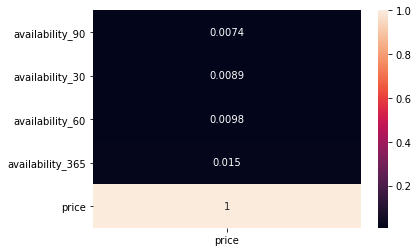

In [71]:
sns.heatmap(availability.corr()[['price']].sort_values('price'), annot = True)

## Check correlations: pre_covid

In [72]:
post.columns

Index(['price', 'dataset', 'room', 'nb', 'accommodates', 'bedrooms', 'beds',
       'superhost', 'id_verified'],
      dtype='object')

In [73]:
post_num = post[['price', 'accommodates', 'bedrooms', 'beds',
       'superhost', 'id_verified']]

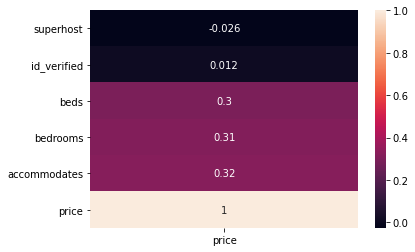

In [74]:
sns.heatmap(post_num.corr()[['price']].sort_values('price'), annot = True)

In [75]:
pre_num = pre[['price', 'accommodates', 'bedrooms', 'beds',
       'superhost', 'id_verified']]

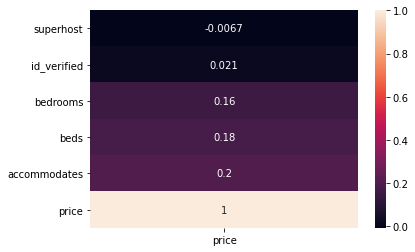

In [59]:
sns.heatmap(pre_num.corr()[['price']].sort_values('price'), annot = True)

In [76]:
post_df = df[df['dataset'] == 'post_covid']

In [77]:
post_df_nb = df[['nb_Back Bay',
 'nb_Bay Village',
 'nb_Beacon Hill',
 'nb_Brighton',
 'nb_Charlestown',
 'nb_Chinatown',
 'nb_Dorchester',
 'nb_Downtown',
 'nb_East Boston',
 'nb_Fenway',
 'nb_Hyde Park',
 'nb_Jamaica Plain',
 'nb_Leather District',
 'nb_Longwood Medical Area',
 'nb_Mattapan',
 'nb_Mission Hill',
 'nb_North End',
 'nb_Roslindale',
 'nb_Roxbury',
 'nb_South Boston',
 'nb_South Boston Waterfront',
 'nb_South End',
 'nb_West End',
 'nb_West Roxbury', 'price']]

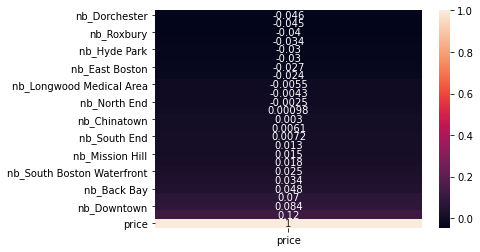

In [78]:
sns.heatmap(post_df_nb.corr()[['price']].sort_values('price'), annot = True)

In [79]:
pre_df = df[df['dataset'] == 'pre_covid']

In [80]:
pre_df_nb = df[['nb_Back Bay',
 'nb_Bay Village',
 'nb_Beacon Hill',
 'nb_Brighton',
 'nb_Charlestown',
 'nb_Chinatown',
 'nb_Dorchester',
 'nb_Downtown',
 'nb_East Boston',
 'nb_Fenway',
 'nb_Hyde Park',
 'nb_Jamaica Plain',
 'nb_Leather District',
 'nb_Longwood Medical Area',
 'nb_Mattapan',
 'nb_Mission Hill',
 'nb_North End',
 'nb_Roslindale',
 'nb_Roxbury',
 'nb_South Boston',
 'nb_South Boston Waterfront',
 'nb_South End',
 'nb_West End',
 'nb_West Roxbury', 'price']]

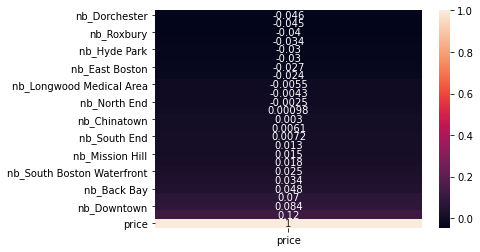

In [81]:
sns.heatmap(pre_df_nb.corr()[['price']].sort_values('price'), annot = True)

In [82]:
room_cols

['room_Hotel room', 'room_Private room', 'room_Shared room']

In [83]:
pre_df_room = df[['room_Hotel room', 'room_Private room', 'room_Shared room', 'price']]

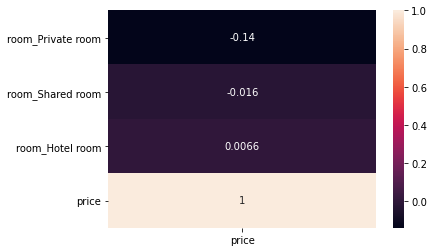

In [84]:
sns.heatmap(pre_df_room.corr()[['price']].sort_values('price'), annot = True)

In [85]:
post_df_room = df[['room_Hotel room', 'room_Private room', 'room_Shared room', 'price']]

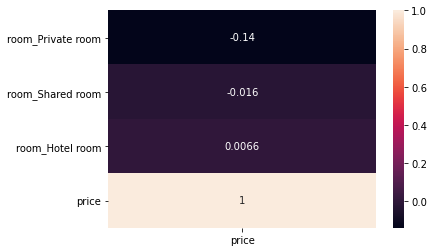

In [86]:
sns.heatmap(post_df_room.corr()[['price']].sort_values('price'), annot = True)

### Neighborhood distribution

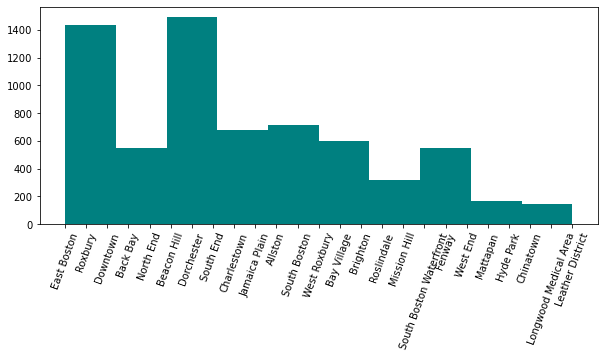

In [87]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation='70')
plt.hist(df['nb'], color = 'teal');

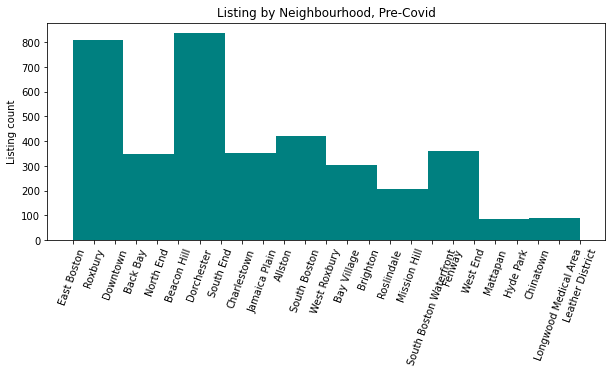

In [88]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation='70')
plt.hist(pre['nb'], color = 'teal')
plt.title('Listing by Neighbourhood, Pre-Covid')
plt.ylabel('Listing count');

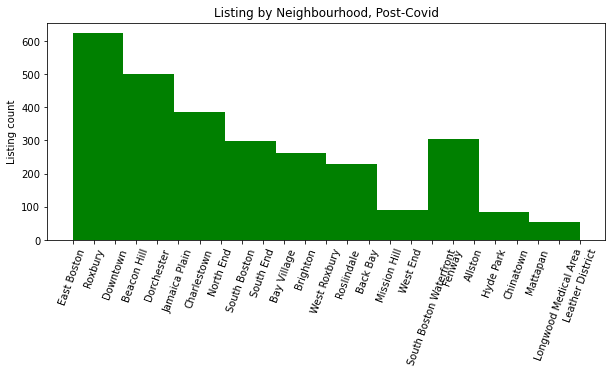

In [89]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation='70', )
plt.hist(post['nb'], color = 'Green')
plt.title('Listing by Neighbourhood, Post-Covid')
plt.ylabel('Listing count');

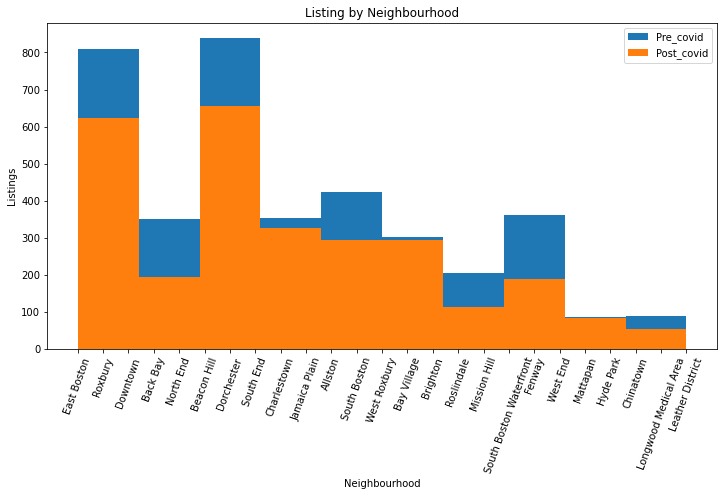

In [90]:
Pre_covid = pre['nb']
Post_covid = post['nb']

#bins = numpy.linspace(-10, 10, 100)

plt.figure(figsize = (12, 6))

plt.hist(Pre_covid, label='Pre_covid')
plt.hist(Post_covid, label='Post_covid')
plt.title('Listing by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.xticks(rotation='70')
plt.ylabel('Listings')
plt.legend(loc='upper right')
plt.show()

#plt.savefig("../charts/title_length_hist.png")
#plt.savefig(title_length_hist, dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

### EDA Outlier dropped

In [28]:
bos_od = bos[bos['price'] <= 2000]

In [29]:
bos_od.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6638 entries, 0 to 6649
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         6638 non-null   float64
 1   dataset       6638 non-null   object 
 2   room          6638 non-null   object 
 3   nb            6638 non-null   object 
 4   accommodates  6638 non-null   int64  
 5   bedrooms      6638 non-null   float64
 6   beds          6638 non-null   float64
 7   superhost     6638 non-null   int64  
 8   id_verified   6638 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 518.6+ KB


In [30]:
bos_od.describe()

,price,accommodates,bedrooms,beds,superhost,id_verified
count,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000
mean,163.712263,3.252034,1.358843,1.746158,0.315155,0.552425
std,148.340510,2.215705,0.887972,1.348735,0.464613,0.497281
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,128.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,199.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,2000.000000,29.000000,13.000000,22.000000,1.000000,1.000000


In [31]:
bos.describe()

,price,accommodates,bedrooms,beds,superhost,id_verified
count,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,176.276241,3.253534,1.360451,1.749173,0.315188,0.552180
std,354.237285,2.219580,0.898772,1.370665,0.464626,0.497307
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,129.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,199.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,10000.000000,29.000000,13.000000,22.000000,1.000000,1.000000


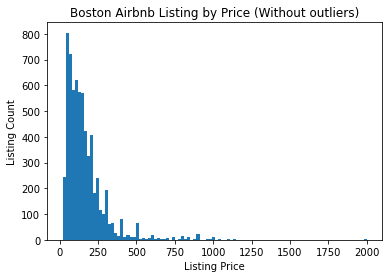

In [32]:
plt.hist(bos_od['price'], bins=100);
plt.title('Boston Airbnb Listing by Price (Without outliers)')
plt.xlabel('Listing Price')
plt.ylabel('Listing Count');

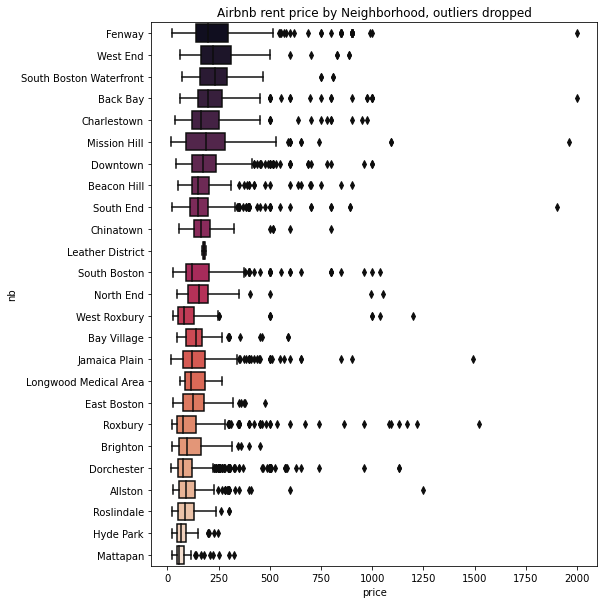

In [33]:
# Make a list of neighborhood sorted by mean 
nb_list = list(bos_od.groupby('nb').price.mean().sort_values(ascending=False).index)

# Make a boxplot for sale price by neighborhood
plt.figure(figsize = (8, 10))
sns.boxplot(y = 'nb', x = 'price', data=bos_od, palette='rocket', order = nb_list).set_title("Airbnb rent price by Neighborhood, outliers dropped");
#plt.savefig("../figs/boxplot_neighborhoods.png")

Text(0, 0.5, 'Price')

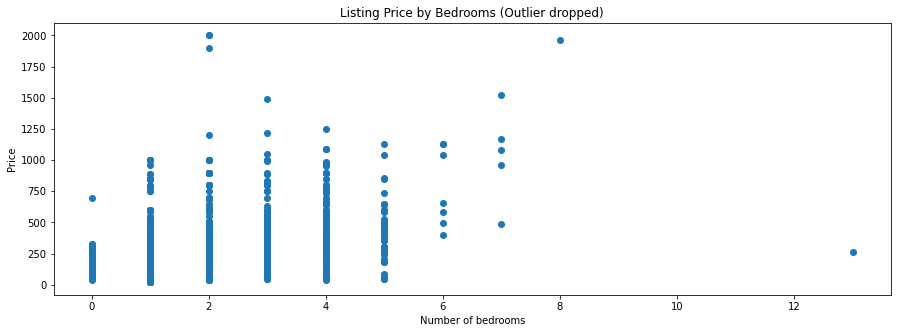

In [34]:
plt.figure(figsize = (15, 5))
plt.scatter(bos_od['bedrooms'], bos_od['price']);

plt.title('Listing Price by Bedrooms (Outlier dropped)')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

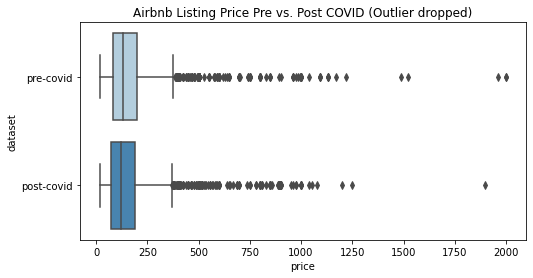

In [48]:
# Make a list of neighborhood sorted by mean 
ds_list = list(bos_od.groupby('dataset').price.mean().sort_values(ascending=False).index)

# Make a boxplot for sale price by neighborhood
plt.figure(figsize = (8, 4))
sns.boxplot(y = 'dataset', x = 'price', 
            data=bos_od, palette='Blues', 
            order = ds_list).set_title("Airbnb Listing Price Pre vs. Post COVID (Outlier dropped)");
#plt.savefig("../figs/boxplot_neighborhoods.png")

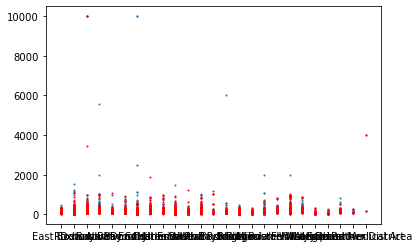

In [49]:
## How to make x.label readable?

plt.scatter(pre["nb"], pre["price"], s=1, )
plt.scatter(post["nb"], post["price"], s=1, color='red')

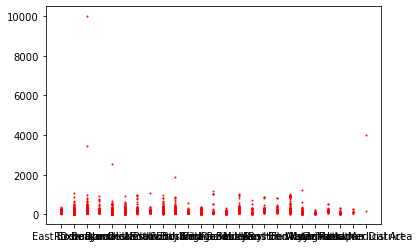

In [50]:
## How to make x.label readable?

plt.scatter(post["nb"], post["price"], s=1, color='red')

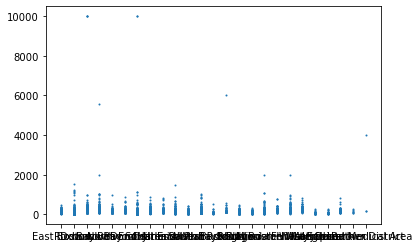

In [51]:
## How to make x.label readable?

plt.scatter(pre["nb"], pre["price"], s=1, )

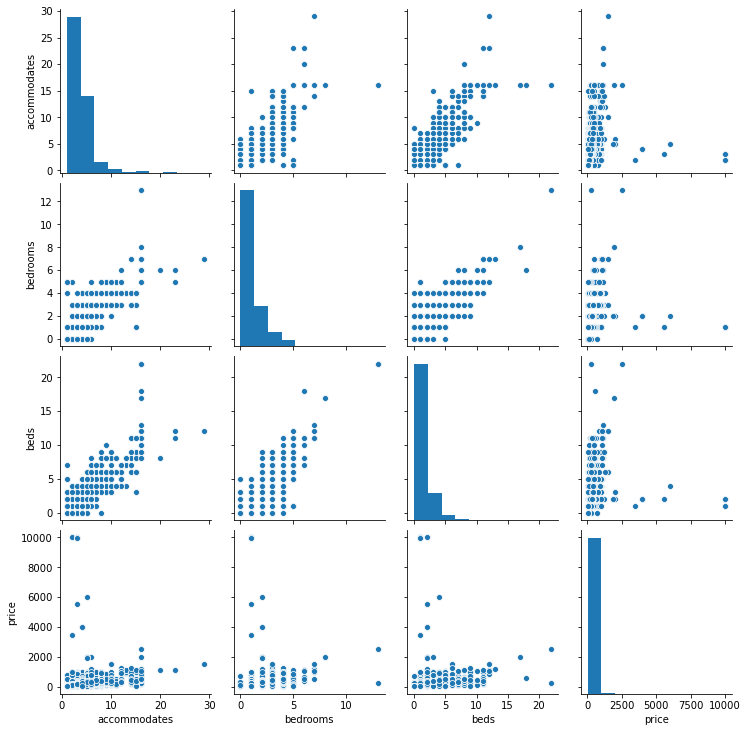

In [52]:
sns.pairplot(num)
#plt.title('Pairplot with outliers included');

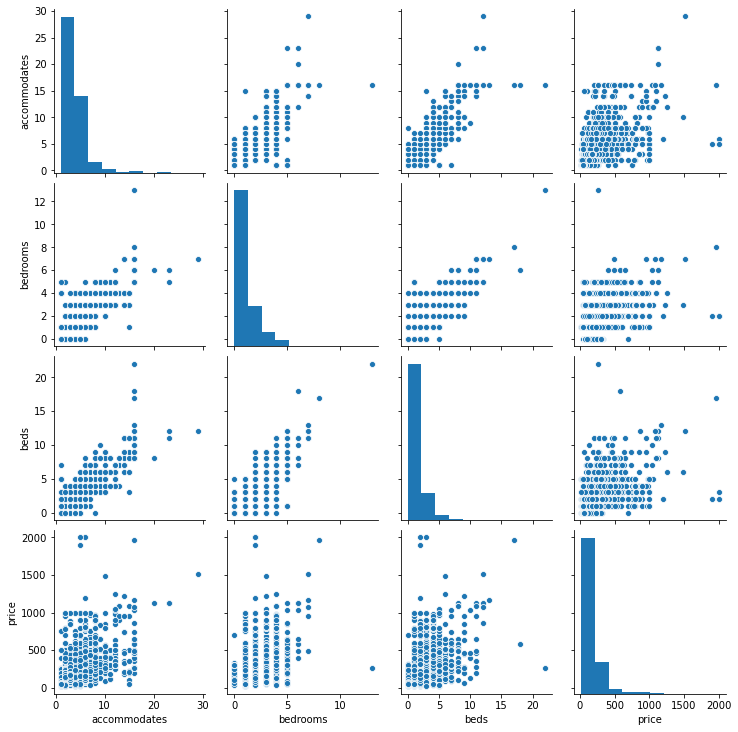

In [53]:
sns.pairplot(bos_od[num_cols])
#plt.title('Pairplot no outliers included');

## Check correlations: whole dataset

In [92]:
num.columns

Index(['room', 'accommodates', 'bedrooms', 'beds', 'price'], dtype='object')

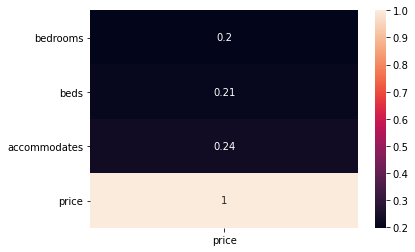

In [93]:
sns.heatmap(num.corr()[['price']].sort_values('price'), annot = True)

In [94]:
nb.columns

Index(['nb_Back Bay', 'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton',
       'nb_Charlestown', 'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown',
       'nb_East Boston', 'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain',
       'nb_Leather District', 'nb_Longwood Medical Area', 'nb_Mattapan',
       'nb_Mission Hill', 'nb_North End', 'nb_Roslindale', 'nb_Roxbury',
       'nb_South Boston', 'nb_South Boston Waterfront', 'nb_South End',
       'nb_West End', 'nb_West Roxbury'],
      dtype='object')

In [95]:
nb_corr = df[['nb_Back Bay', 'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton',
       'nb_Charlestown', 'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown',
       'nb_East Boston', 'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain',
       'nb_Leather District', 'nb_Longwood Medical Area', 'nb_Mattapan',
       'nb_Mission Hill', 'nb_North End', 'nb_Roslindale', 'nb_Roxbury',
       'nb_South Boston', 'nb_South Boston Waterfront', 'nb_South End',
       'nb_West End', 'nb_West Roxbury', 'price']]

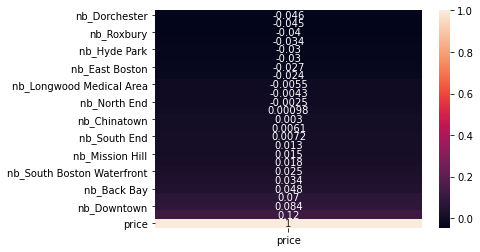

In [96]:
sns.heatmap(nb_corr.corr()[['price']].sort_values('price'), annot = True)

In [97]:
room.columns

Index(['room_Hotel room', 'room_Private room', 'room_Shared room'], dtype='object')

In [98]:
room_df = df[['room_Hotel room', 'room_Private room', 'room_Shared room', 'price']]

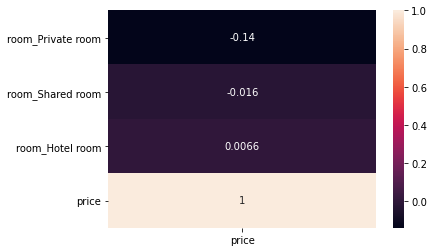

In [99]:
sns.heatmap(room_df.corr()[['price']].sort_values('price'), annot = True)

In [100]:
df.columns

Index(['name', 'host_is_superhost', 'host_identity_verified', 'nb', 'property',
       'room', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'dataset', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'superhost', 'id_verified', 'nb_Back Bay',
       'nb_Bay Village', 'nb_Beacon Hill', 'nb_Brighton', 'nb_Charlestown',
       'nb_Chinatown', 'nb_Dorchester', 'nb_Downtown', 'nb_East Boston',
       'nb_Fenway', 'nb_Hyde Park', 'nb_Jamaica Plain', 'nb_Leather District',
       'nb_Longwood Medical Area', 'nb_Mattapan', 'nb_Mission Hill',
       'nb_North End', 'nb_Roslindale', 'nb_Roxbury', 'nb_South Boston',
       'nb_South Boston Waterfront', 'nb_South End', 'nb_West End',
       'nb_West Roxbury', 'room_Hotel room', 'room_Private room',
       'room_Shared room', 'property_Apartment', 'property_Barn',
       'property_Bed and breakfast', 'property_Boat',
       'property_Boutique hotel', 'property_Bungalow', 'property_Castle',
    

In [101]:
availability = df[['availability_30', 'availability_60', 'availability_90',
       'availability_365', 'price']]

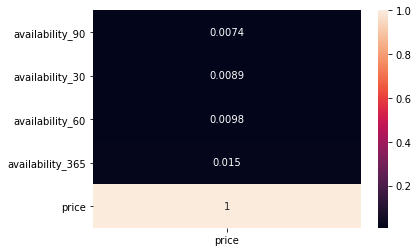

In [102]:
sns.heatmap(availability.corr()[['price']].sort_values('price'), annot = True)

In [103]:
num_cols

['room', 'accommodates', 'bedrooms', 'beds', 'price']

In [104]:
property_df = df[['price', 'property_Bed and breakfast', 'property_Boat',
       'property_Boutique hotel', 'property_Bungalow', 'property_Castle',
       'property_Condominium', 'property_Cottage', 'property_Entire apartment',
       'property_Entire bed and breakfast', 'property_Entire condominium',
       'property_Entire cottage', 'property_Entire guest suite',
       'property_Entire guesthouse', 'property_Entire home/apt',
       'property_Entire house', 'property_Entire loft',
       'property_Entire place', 'property_Entire serviced apartment',
       'property_Entire townhouse', 'property_Guest suite',
       'property_Guesthouse', 'property_Hostel', 'property_Hotel',
       'property_House', 'property_Houseboat', 'property_Loft',
       'property_Other', 'property_Private room in apartment',
       'property_Private room in bed and breakfast',
       'property_Private room in bungalow', 'property_Private room in castle',
       'property_Private room in condominium',
       'property_Private room in guest suite',
       'property_Private room in guesthouse', 'property_Private room in house',
       'property_Private room in loft', 'property_Private room in townhouse',
       'property_Private room in villa', 'property_Room in aparthotel',
       'property_Room in bed and breakfast', 'property_Room in boutique hotel',
       'property_Room in hostel', 'property_Room in hotel',
       'property_Serviced apartment', 'property_Shared room in apartment',
       'property_Shared room in bed and breakfast',
       'property_Shared room in boutique hotel',
       'property_Shared room in condominium', 'property_Shared room in house',
       'property_Shared room in townhouse', 'property_Townhouse',
       'property_Villa']]

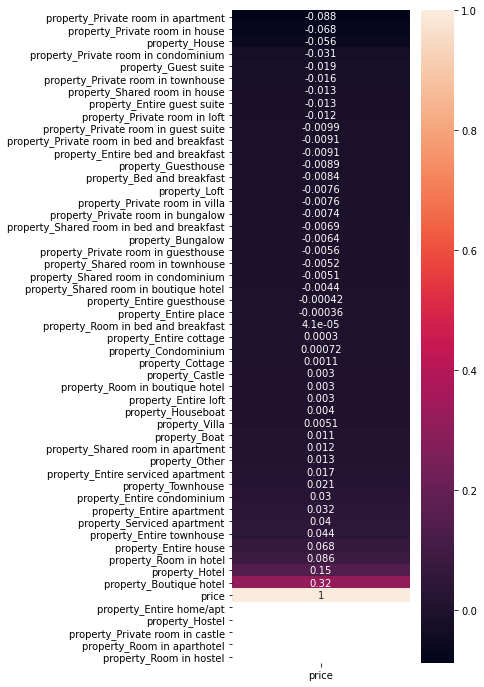

In [112]:
plt.figure(figsize=(4, 12))
sns.heatmap(property_df.corr()[['price']].sort_values('price'), annot = True)